# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

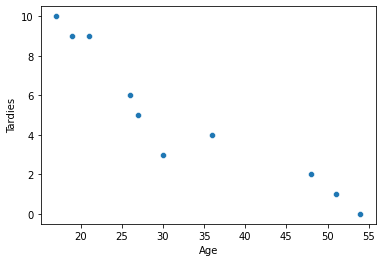

In [3]:
# Your code here.
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'''Efectivamente en el diagrama podemos ver que existe una relación entre la edad y los minutos tarde 
o por lo menos es lo que se observa. Pero que habrá que desmostrarlo con datos.'''

'Efectivamente en el diagrama podemos ver que existe una relación entre la edad y los minutos tarde \no por lo menos es lo que se observa. Pero que habrá que desmostrarlo con datos.'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#Nos dará una covarianza negativa. Debido a que los valores altos de Y corresponden a los valores más bajps de X.
#cov(x,y)<0
student_data[["Age","Tardies"]].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
#El coeficiente de correlación de Pearson mide la correlación líneal entre dos variables.
# A continuación vemos que su correlación es muy cercana a -1. Por lo tanto tiene una correlación negativa.
corr_stud = student_data[["Age","Tardies"]].corr()

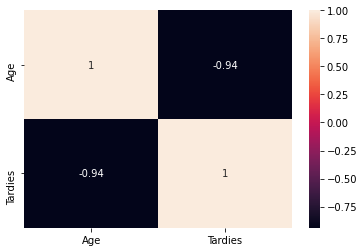

In [7]:
sns.heatmap(data=corr_stud,annot=True); 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.


### Es una regresión líneal simple, ya te tiene una variable dependiente Y y una varibale independiente X. 
$$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$
### La variable de resultado será la Y(variable dependiente) , que es Tardies. 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

#la variable independiente siempre se pasa a dataframe. Actualmente Age es un serie de pandas.
X=student_data.Age.to_frame()
y=student_data.Tardies

In [10]:
lr.fit(
    X=student_data.Age.to_frame(),
    y=student_data.Tardies
)

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
(beta_1,beta_0)

(-0.2428207709159809, 12.888803363135771)

Plot your regression model on your scatter plot.

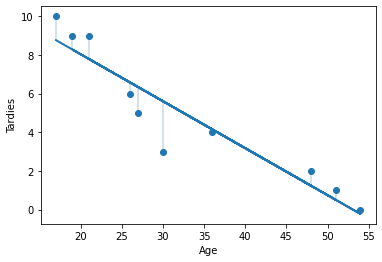

In [11]:
# regression line1
y_hat = beta_0 + beta_1 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [12]:
# Your response here. 
import statsmodels.formula.api as smf

In [13]:
results = smf.ols('Tardies ~ Age', data=student_data).fit()
results.summary()

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           5.57e-05
Time:                        21:53:34   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
'''El R-squared: es bueno ya que es de 0.882. El r-squared mide lo bueno que es tu modelo líneal. 
Y cuanto más cerca de a 1 mejor es, teniendo en cuanto que a partir de 0.60 se considera bueno.

Intercept: 12.8888 .Es la constante o término independiente, porque no depende de ninguna variable 
e indica dónde cruza al eje de ordenadas. Esto quiere decir que cuando x=0, y=12.8888

El coef Age: -0.2428 .Es la pendiente que indica el aumento de Y que acompaña a un aumento de X en 1 unidad.

P>|t| Age: 0.000 .Es menor de 0.05 por lo tanto la variable Age influye en la relación.'''

'El R-squared: es bueno ya que es de 0.882. El r-squared mide lo bueno que es tu modelo líneal. \nY cuanto más cerca de a 1 mejor es, teniendo en cuanto que a partir de 0.60 se considera bueno.\n\nIntercept: 12.8888 .Es la constante o término independiente, porque no depende de ninguna variable \ne indica dónde cruza al eje de ordenadas. Esto quiere decir que cuando x=0, y=12.8888\n\nEl coef Age: -0.2428 .Es la pendiente que indica el aumento de Y que acompaña a un aumento de X en 1 unidad.\n\nP>|t| Age: 0.000 .Es menor de 0.05 por lo tanto la variable Age influye en la relación.'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [22]:
vehicles.columns = vehicles.columns.str.replace(" ", "_").str.replace("/", "_per_")
vehicles.head()

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_per_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [23]:
# Your response here. 
vehicles = vehicles[["Year","Cylinders","Fuel_Barrels_per_Year","Combined_MPG","Fuel_Cost_per_Year","CO2_Emission_Grams_per_Mile"]]

In [18]:
corr_veh= vehicles.corr()
corr_veh

,Year,Cylinders,Fuel_Barrels_per_Year,Combined_MPG,Fuel_Cost_per_Year,CO2_Emission_Grams_per_Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel_Barrels_per_Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel_Cost_per_Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2_Emission_Grams_per_Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


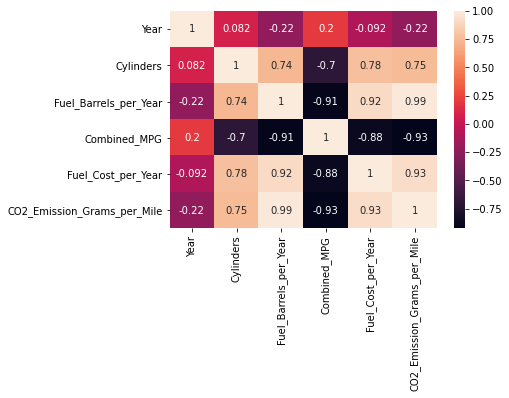

In [37]:
sns.heatmap(data=corr_veh,annot=True); 

### La variable más importante es $Fuel Barrels/Year$ con una correlación de 0.986189 ya que es la que más se acerca a 1. Pero también debemos de contemplar: $Fuel Cost/Year, Combined MPG y Cylinders$.

### La variable que propociona la menor cantidad de información útil es Year con una correlación de -0.222300

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

La siguiente combinación es la que 

In [78]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Combined_MPG + Fuel_Cost_per_Year ', data=vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.977
Model:                                     OLS   Adj. R-squared:                  0.977
Method:                          Least Squares   F-statistic:                 7.708e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 22:57:40   Log-Likelihood:            -1.5487e+05
No. Observations:                        35952   AIC:                         3.098e+05
Df Residuals:                            35949   BIC:                         3.098e+05
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.0210      0.387     25.924      0.000       9.263      10.779
Fuel_Barrels_per_Year    22.1302      0.053    417.913      0.000      22.026      22.234
Fuel_Cost_per_Year        0.0399      0.000     85.609      0.000       0.039       0.041
==============================================================================
Omnibus:                    78651.444   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        451445567.696
Skew:                          20.059   Prob(JB):                         0.00
Kurtosis:                     550.500   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~  Combined_MPG*Fuel_Barrels_per_Year + Fuel_Cost_per_Year*Fuel_Barrels_per_Year + Combined_MPG*Fuel_Cost_per_Year ', data=vehicles).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [92]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.993
Model:                                     OLS   Adj. R-squared:                  0.993
Method:                          Least Squares   F-statistic:                 8.091e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 23:21:05   Log-Likelihood:            -1.3453e+05
No. Observations:                        35952   AIC:                         2.691e+05
Df Residuals:                            35945   BIC:                         2.691e+05
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  220.2960      2.518     87.474      0.000     215.360     225.232
Combined_MPG                                 1.2808      0.058     21.981      0.000       1.167       1.395
Fuel_Barrels_per_Year                       15.0854      0.132    114.109      0.000      14.826      15.345
Combined_MPG:Fuel_Barrels_per_Year          -0.0885      0.007    -13.326      0.000      -0.102      -0.076
Fuel_Cost_per_Year                           0.1776      0.001    129.768      0.000       0.175       0.180
Fuel_Cost_per_Year:Fuel_Barrels_per_Year    -0.0014   3.06e-05    -45.641      0.000      -0.001      -0.001
Combined_MPG:Fuel_Cost_per_Year             -0.0083   5.82e-05   -142.421      0.000      -0.008      -0.008
==============================================================================
Omnibus:                    35378.571   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7286038.782
Skew:                           4.328   Prob(JB):                         0.00
Kurtosis:                      72.202   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [94]:
# Your code here. 
party = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attended': [1,2,4,4,5,7,8,13]})
party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invited', ylabel='attended'>

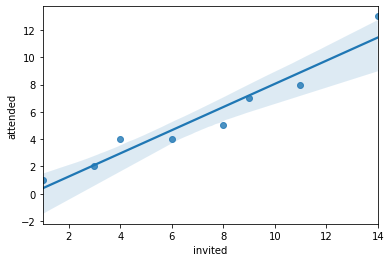

In [98]:
# Your code here.
sns.regplot(x=party.invited,y=party.attended)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

### Una regresión simple positiva 

In [101]:
party.corr()

,invited,attended
invited,1.00000,0.96523
attended,0.96523,1.00000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [106]:
# En la anterios gráfica podemos ver que los siguintes puntos son los problemáticos :(4,4),(8,5),(14,13)

In [ ]:
# No sé como eliminar los puntos (4,4),(8,5),(14,13) que no sea de forma manual 

In [104]:
# Your response here. 
party2 = pd.DataFrame({'invited': [1,3,6,9,11], 'attended': [1,2,4,7,8]})

<AxesSubplot:xlabel='invited', ylabel='attended'>

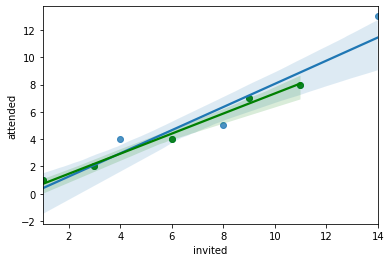

In [105]:
sns.regplot(x=party.invited,y=party.attended, label="party" )
sns.regplot(x=party2.invited,y=party2.attended, label="party2", color="green")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [107]:
# Your response here. 
'''Pues que la línea de regresión cambia como podemos ver en el gráfico anterior.'''

'Pues que la línea de regresión cambia como podemos ver en el gráfico anterior.'